In [1]:
import numpy as np
import matplotlib.pyplot as plt
import growthmethods as gm
from scipy.io import loadmat
from scipy.stats import pareto

np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [2]:
# Parameters
rho = 0.06
theta = 0.5
k = 0.05

# Meeting technology
eta = 0.3
alpha0 = 0.0849

# Updating parameter
xi = 0.4

# Grid
I = 2001
xmin = 0 
xmax = 3

In [3]:
v, sigma, alpha, f, F, gamma, xgrid, it = gm.KGAT(rho, theta, k, eta, alpha0, xi, xmin, xmax, I)

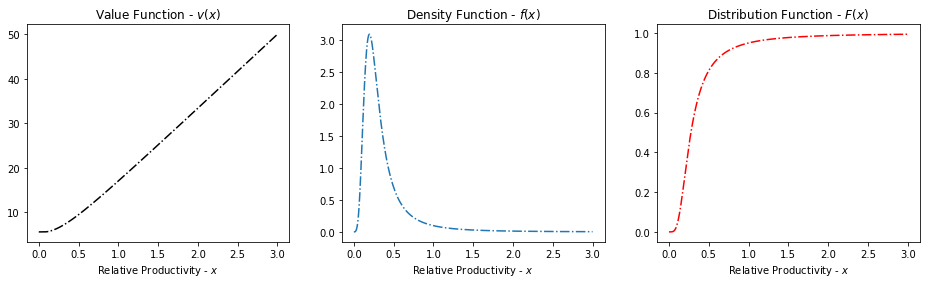

In [4]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (16,4))

ax1.plot(xgrid,v, linestyle = '-.', color = 'black')
ax2.plot(xgrid,f, linestyle = '-.')
ax3.plot(xgrid,F, linestyle = '-.', color = 'red')

ax1.set_title('Value Function - $v(x)$')
ax2.set_title('Density Function - $f(x)$')
ax3.set_title('Distribution Function - $F(x)$')
ax1.set_xlabel('Relative Productivity - $x$')
ax2.set_xlabel('Relative Productivity - $x$')
ax3.set_xlabel('Relative Productivity - $x$')

plt.show()

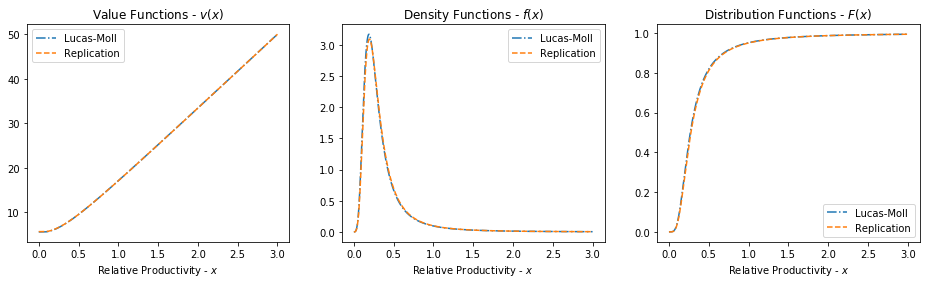

In [5]:
moll = loadmat('equilibrium.mat')

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (16,4))

ax1.plot(moll['x'], moll['v'], linestyle = '-.')
ax1.plot(xgrid,v, linestyle = 'dashed')
ax2.plot(moll['x'], moll['f'], linestyle = '-.')
ax2.plot(xgrid,f, linestyle = 'dashed')
ax3.plot(moll['x'], moll['F'], linestyle = '-.')
ax3.plot(xgrid,F, linestyle = 'dashed')

ax1.set_xlabel('Relative Productivity - $x$')
ax1.set_title('Value Functions - $v(x)$')
ax1.legend(['Lucas-Moll', 'Replication'])

ax2.set_xlabel('Relative Productivity - $x$')
ax2.set_title('Density Functions - $f(x)$')
ax2.legend(['Lucas-Moll', 'Replication'])

ax3.set_xlabel('Relative Productivity - $x$')
ax3.set_title('Distribution Functions - $F(x)$')
ax3.legend(['Lucas-Moll', 'Replication'])

plt.savefig('KGAT1.png')

In [6]:
# Change value of theta:
theta = 0.8
v2, sigma2, alpha2, f2, F2, gamma2, xgrid2, it2 = gm.KGAT(rho, theta, k, eta, alpha0, xi, xmin, xmax, I)

In [7]:
# Need to normalize by a common factor since units are arbitrary
# So, find median productivity

med1 = xgrid[[0.499 < i < 0.501 for i in F]]
med2 = xgrid2[[0.499 < i < 0.501 for i in F2]]

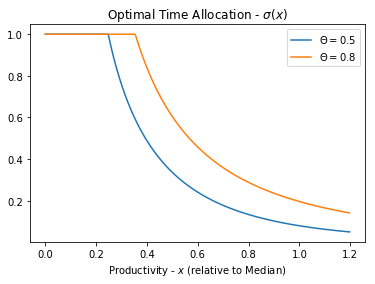

In [8]:
index = xgrid <= med1*6/5
index2 = xgrid2 <= med2*6/5
plt.plot((xgrid/med1)[index], sigma[index])
plt.plot((xgrid2/med2)[index2], sigma2[index2])
plt.legend(['$\Theta = 0.5$', '$\Theta = 0.8$'])
plt.xlabel('Productivity - $x$ (relative to Median)')
plt.title('Optimal Time Allocation - $\sigma(x)$')
plt.savefig('KGAT2.png')

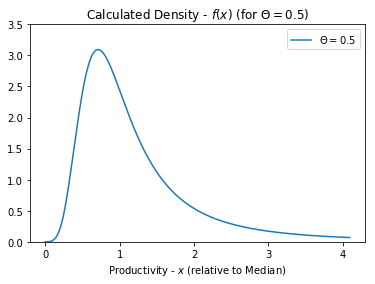

In [9]:
# Density function
index = xgrid <= med1*4.1
plt.plot((xgrid/med1)[index], f[index])
#plt.plot(x/med1, rv.pdf(x))
plt.legend(['$\Theta = 0.5$'])
plt.xlabel('Productivity - $x$ (relative to Median)')
plt.title('Calculated Density - $f(x)$ (for $\Theta = 0.5$)')
plt.ylim([0,3.5])
plt.show()

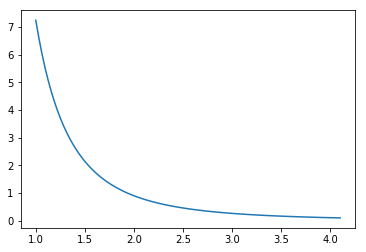

In [10]:
b = 2
rv = pareto(b, scale = med1)
x = np.linspace(med1,4.1*med1,100)
plt.plot(x/med1, rv.pdf(x))

plt.show()

In [11]:
theta = 0.5
# Optimal Time allocation for different eta:
eta = 0.3
v, sigma, alpha, f, F, gamma, xgrid, it = gm.KGAT(rho, theta, k, eta, alpha0, xi, xmin, xmax, I)

eta = 0.6
v2, sigma2, alpha2, f2, F2, gamma2, xgrid2, it2 = gm.KGAT(rho, theta, k, eta, alpha0, xi, xmin, xmax, I)

eta = 0.9
xmax = 4
v3, sigma3, alpha3, f3, F3, gamma3, xgrid3, it3 = gm.KGAT(rho, theta, k, eta, alpha0, xi, xmin, xmax, I)


In [12]:
med1 = xgrid[[0.499 < i < 0.501 for i in F]]
med2 = xgrid2[[0.499 < i < 0.501 for i in F2]]
med3 = xgrid3[[0.499 < i < 0.501 for i in F3]]

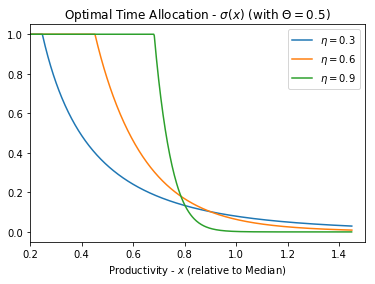

In [13]:
index = xgrid <= med1*1.45
index2 = xgrid2 <= med2*1.45
index3 = xgrid3 <= med3*1.45

plt.plot((xgrid/med1)[index], sigma[index])
plt.plot((xgrid2/med2)[index2], sigma2[index2])
plt.plot((xgrid3/med3)[index3], sigma3[index3])
plt.legend(['$\eta = 0.3$', '$\eta = 0.6$', '$\eta = 0.9$'])
plt.xlabel('Productivity - $x$ (relative to Median)')
plt.title('Optimal Time Allocation - $\sigma(x)$ (with $\Theta = 0.5$)')
plt.xlim([0.2,1.5])
plt.savefig('KGAT3')

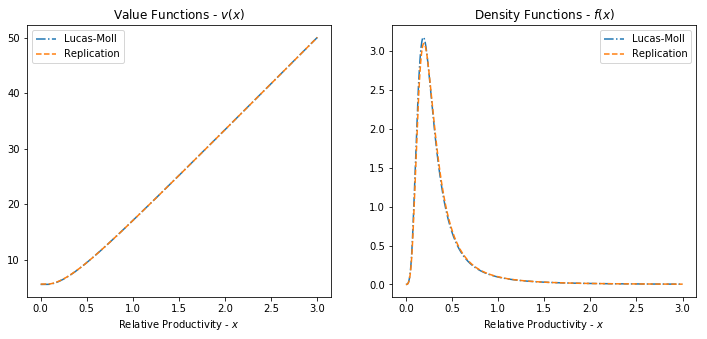

In [14]:
moll = loadmat('equilibrium.mat')

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (12,5))

ax1.plot(moll['x'], moll['v'], linestyle = '-.')
ax1.plot(xgrid,v, linestyle = 'dashed')
ax2.plot(moll['x'], moll['f'], linestyle = '-.')
ax2.plot(xgrid,f, linestyle = 'dashed')


ax1.set_xlabel('Relative Productivity - $x$')
ax1.set_title('Value Functions - $v(x)$')
ax1.legend(['Lucas-Moll', 'Replication'])

ax2.set_xlabel('Relative Productivity - $x$')
ax2.set_title('Density Functions - $f(x)$')
ax2.legend(['Lucas-Moll', 'Replication'])


plt.savefig('KGAT4.png')